<a href="https://colab.research.google.com/github/MicroprocessorX069/Image-morphology-segmentation-and-Hough-transform/blob/master/ImageMorphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
def convolution11(input_image, kernel,threshold):
  #black should go as zero and white as one for both kernel and image
  w_input=len(input_image[0])
  h_input=len(input_image)
  input_image=np.array(input_image)
  padded_input=pad_image(input_image,int((len(kernel)-1)/2),int((len(kernel[0])-1)/2))
  padded_input=np.array(padded_input)
  kernel=flip(kernel)
  sum_kernel=np.sum(kernel)
  new_image=np.zeros((len(input_image)+1,len(input_image[0])+1))

  for input_x in range(0,h_input):
    for input_y in range(0,w_input):
        new_image[input_x,input_y]=0
        sum_img=0
        for kernel_x in range(0,len(kernel)):
           for kernel_y in range(0,len(kernel[0])):
              new_image[input_x,input_y]=int(new_image[input_x,input_y]) + int(padded_input[input_x+kernel_x, input_y+kernel_y])*int(kernel[kernel_x,kernel_y])
        
        if new_image[input_x,input_y]>= threshold:
          new_image[input_x,input_y]=1 #white
        else:
          new_image[input_x,input_y]=0 #blacck
        
 
  return(new_image)

def flip(matrix):
  new_matrix=np.zeros((matrix.shape))
  matrix=np.array(matrix)
  l=len(matrix)
  for i in range(l):
    for j in range(l):
      new_matrix[i,j]=matrix[l-i-1,l-j-1]
  return(new_matrix)

def negative(input_image2):
  #new_image2=np.zeros((len(input_image),len(input_image[0])))
  input_image=(input_image2.astype(int))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
         if input_image[x,y]==1:
            input_image[x,y]=0
         else:
            input_image[x,y]=1
          
  return(np.array(input_image))

def pad_image(image,pad_x,pad_y):
  image_x=len(image[0])
  image_y=len(image)
  padded_image=np.zeros((image_y+pad_y*2,image_x+pad_x*2))
  padded_image_x=len(padded_image[0])
  padded_image_y=len(padded_image)
  
  for i in range(pad_y,image_y+pad_y):
    for j in range(pad_x, image_x+pad_x):
      padded_image[i,j]=image[i-pad_y,j-pad_x]
  return(padded_image)

def threshold(input_image,threshold):
  w=len(input_image[0])
  h=len(input_image)
  input_image=np.array(input_image)
  
  for x in range(h):
    for y in range(w):
      if input_image[x,y]>= threshold:
        input_image[x,y]=1
      else:
        input_image[x,y]=0
  return list(input_image)

def count_ones(kernel):
  kernel=np.array((kernel.flatten()))
  return(np.count_nonzero(kernel))

def erode(input_image,kernel):
  s_kernel=count_ones(kernel)
  new_image=convolution11(input_image,kernel,s_kernel)
  return(np.array(new_image)) # returns new_image, black as 0 and white as 1 . # but viewable is inverse of it

def dilate(input_image,kernel):
  #w_kernel=len(kernel[0])
  new_image=convolution11(input_image,kernel,1)
  return(np.array(new_image))

def open(input_image,kernel):
  erode1=erode(input_image,kernel)
  new_image=dilate(erode1,kernel)
  return(np.array(new_image))

def close(input_image,kernel):
  dilate1=dilate(input_image,kernel)
  new_image=erode(dilate1,kernel)
  return(np.array(new_image))

##Task1 driver


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#black =0
#white=1
kernel=np.array([[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1]])
input_image=cv2.imread("noise.jpg",cv2.IMREAD_GRAYSCALE) #make sure the path to the image is in String format
input_image=[[]]
input_image=np.array(threshold(input_image,150))

#converting grayscale image to binary
cv.imwrite("res_noise1.jpg")

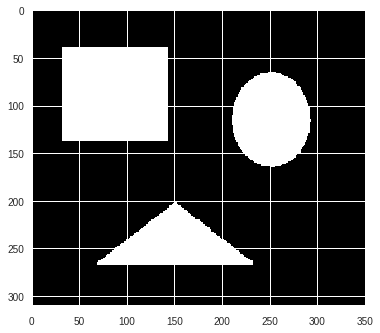

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#black =1
#white=0


kernel_all=np.array([[0,0,0],[0,0,0],[0,0,0]])#black as 1 and white as zero, need to be inverted
input_image=cv2.imread("noise.jpg",cv2.IMREAD_GRAYSCALE) #make sure the path to the image is in String format
input_image=np.array(threshold(input_image,150))

input_image=np.array(negative(input_image))
kernel_all=negative(kernel_all)
#images and kernel ready
import cv2 as cv
#1 open close
close1=close(input_image,kernel_all)
res_noise1=open(close1,kernel_all)
view1=negative(res_noise1)
cv.imwrite("res_noise1.jpg",res_noise1)

#1 open close
open1=open(input_image,kernel_all)
res_noise2=close(open1,kernel_all)
view2=negative(res_noise2)
cv.imwrite("res_noise2.jpg",res_noise2)


# f, axarr = plt.subplots(1,2)
# axarr[0].imshow(negative(view1))#white as one and black as zero
# axarr[1].imshow(negative(view2))
# # axarr[1,0].imshow(view_erode2)
# # axarr[1, 1].imshow(view_dilate1)

# f.subplots_adjust(hspace=0.3)
# # cv2.imwrite("1c2.jpg",view_erode1)
# plt.show()
plt.imshow(negative(view1))
plt.savefig("res_noise1.jpg")
plt.imshow(negative(view2))
plt.savefig("res_noise2.jpg")

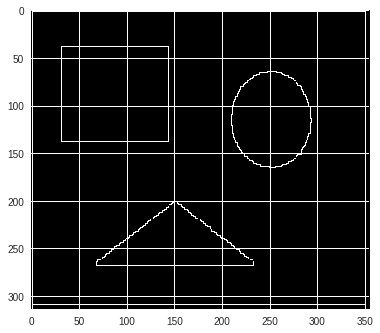

In [0]:
res_bound1=np.subtract(res_noise1,erode(res_noise1,kernel_all)[0:314,0:355])
plt.imshow(negative(res_bound1))
plt.savefig("res_bound1.jpg")
res_bound2=np.subtract(res_noise2,erode(res_noise2,kernel_all)[0:314,0:355])
plt.imshow(negative(res_bound2))
plt.savefig("res_bound2.jpg")

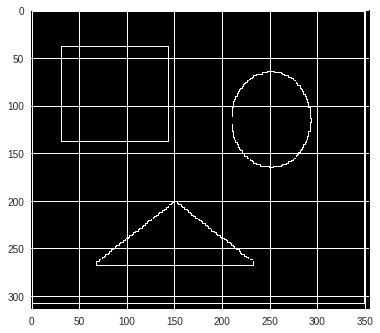

## DO NOT EXECUTE

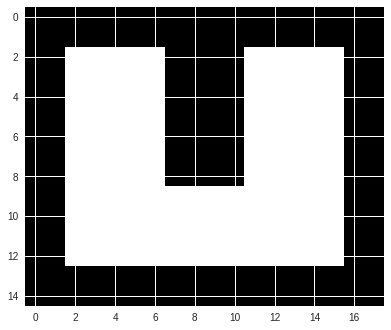

In [0]:
#black as 1 and white as 0
input_image=np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
plt.imshow(input_image)

## Homework 1 Driver

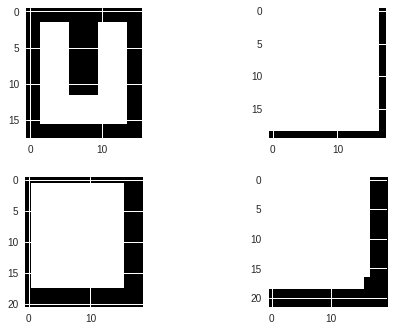

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#black =1
#white=0

kernel_corner=np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,0]]) #black as 1 and white as zero, need to be inverted
kernel_horizontal=np.array([[1,1,1],[0,0,0],[1,1,1]]) #black as 1 and white as zero, need to be inverted
kernel_all=np.array([[0,0,0],[0,0,0],[0,0,0]])#black as 1 and white as zero, need to be inverted
kernel_vertical=np.array([[1,0,1],[1,0,1],[1,0,1]])#black as 1 and white as zero, need to be inverted
kernel_circle=np.array([[1,1,0,1,1],[1,0,0,0,1],[0,0,0,0,0],[1,0,0,0,1],[1,1,0,1,1]])
kernel_plus=np.array([[1,0,1],[0,0,0],[1,0,1]])
#kernel=np.array([[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]])
# equal sides 4x4
input_image=np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
# large sides 5x4
#input_image=np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
#   4x3
#input_image=np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
#3x3
#input_image=np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1], [1,1,0,0,0,1,1,1,1,0,0,0,1,1], [1,1,0,0,0,1,1,1,1,0,0,0,1,1], [1,1,0,0,0,1,1,1,1,0,0,0,1,1], [1,1,0,0,0,1,1,1,1,0,0,0,1,1], [1,1,0,0,0,1,1,1,1,0,0,0,1,1], [1,1,0,0,0,1,1,1,1,0,0,0,1,1], [1,1,0,0,0,1,1,1,1,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,1,1], [1,1,0,0,0,0,0,0,0,0,0,0,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
# for negative input_image must be numpy
input_image=np.array(negative(input_image))
kernel=negative(kernel_horizontal)
kernel2=negative(kernel_all)
kernel_circle=negative(kernel_circle)
kernel_plus=negative(kernel_plus)
kernel_vertical=negative(kernel_vertical)
kernel1=np.array([[1,1,1],[1,1,0],[1,1,0]])
kernel1=np.array(kernel1)
#images and kernel ready

#1 erosion
erode1=close(input_image,kernel_all)
view_erode1=negative(erode1)

#2 erosion
erode2=erode(erode1,kernel_plus)
view_erode2=negative(erode2)

#2 erosion
dilate1=dilate(erode2,kernel1)
view_dilate1=negative(dilate1)

f, axarr = plt.subplots(2,2)
axarr[0, 0].imshow(negative(input_image))#white as one and black as zero
axarr[0,1].imshow(view_erode1)
axarr[1,0].imshow(view_erode2)
axarr[1, 1].imshow(view_dilate1)
# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.3)
cv2.imwrite("1c2.jpg",view_erode1)
plt.show()


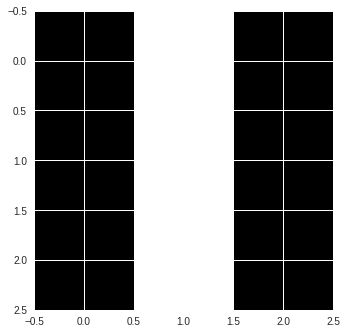

In [0]:
kernel_plus=np.array([[1,0,1],[1,0,1],[1,0,1]])
plt.imshow(kernel_plus)

In [0]:
kernel_circle=cv2.imread("circle kernel.PNG",cv2.IMREAD_GRAYSCALE) #make sure the path to the image is in String format
kernel_circle=np.array(threshold(kernel_circle,150))
kernel_circle=np.arraykernel_circle[9:13,6:10]
#black is 1 white is zero
kernel_circle=np.array([[1,1,0,1,1],[1,0,0,0,1],[0,0,0,0,0],[0,0,0,0,0],[1,0,0,0,1],[1,1,0,1,1]])

[[1 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 1]]
